In [ ]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import pandas as pd
from assocplots.manhattan import *
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 2

import warnings
warnings.filterwarnings('ignore')

# How I use Assocplots for Manhattan plots
For the official tutorial - https://github.com/khramts/assocplots/blob/master/Tutorial.ipynb

# Read the data and print set of traits
Code below assumes Tassel5 output but should be easy to port.

In [ ]:
df = pd.read_csv("Trait12_results.txt", sep="\t")
set(df["Trait"])

# Set the colors and p-value threshold

In [ ]:
dfg = df[df["Trait"]=="TraitA"][["Chr", "Pos", "p"]].reset_index().drop(["index"], axis=1)
dfz = df[df["Trait"]=="TraitB"][["Chr", "Pos", "p"]].reset_index().drop(["index"], axis=1)

chrs = [str(i) for i in range(1,10)]
chrs_names = np.array([str(i) for i in range(1,11)])
#chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

# Alternatively you can input colors by hand
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB
colors = [hex2color(colors[i]) for i in range(len(colors))]

from statsmodels.sandbox.stats.multicomp import multipletests
# Create a list of the adjusted p-values
p_adjusted = multipletests(dfg['p'], alpha=0.05, method='bonferroni')

print(p_adjusted)

# Draw the inverted Manhattan plot

0

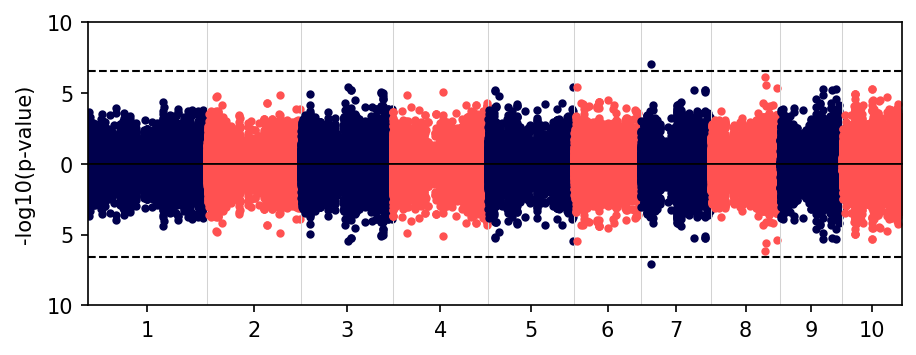

In [17]:
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in [0.0,0.67]]
#mpl.rcParams['figure.figsize']=4.75, 2.5
mpl.rcParams['figure.figsize']=7, 2.5

manhattan(dfg['p'], dfg['Pos'], dfg['Chr'].astype(str), label1="",#'Gln-18:3',
          p2=dfz['p'], pos2=dfz['Pos'], chr2=dfz['Chr'].astype(str), label2="",#'ZmPep3',
          plot_type='inverted',
          chrs_plot=[str(i) for i in range(1,11)],
          chrs_names=chrs_names,
          cut = 0,
          title='',
          xlabel='',#'chromosome',
          #ylabel='',
          ylabel='-log10(p-value)',
          lines= [-np.log10(p_adjusted[-1])],
          lines_styles=['--'],
          lines_colors=['black'],
          top1 = 10,
          top2 = 10,
          colors = colors)
#Uncomment to save figure as an image. Svg not recommended for large amount of SNPs
#plt.savefig('FAC_locus.svg')#, dpi=300, transparent=True)

# Draw a single Manhattan plot

0

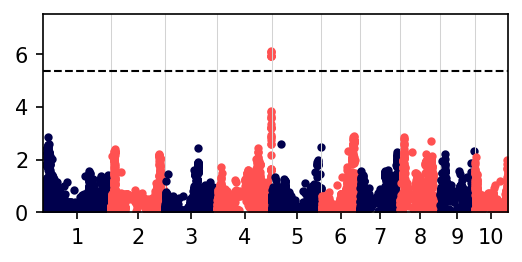

In [32]:
dfg = df[df["Trait"]=="Trait3"][["Chr", "Pos", "p"]].reset_index().drop(["index"], axis=1)

cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in [0.0,0.67]]
mpl.rcParams['figure.figsize']=4, 1.75
#mpl.rcParams['figure.figsize']=7.375, 5.375

manhattan(dfg['p'], dfg['Pos'], dfg['Chr'].astype(str), '',
          plot_type='single',
          chrs_plot=[str(i) for i in range(1,11)],
          chrs_names=chrs_names,
          cut = 0,
          title='',
          xlabel='',#'chromosome',
          ylabel='',#'-log10(p-value)',
          lines= [-np.log10(p_adjusted[-1])],
          lines_styles=['--'],
          lines_colors=['black'],
          top1 = 7.5,
          colors = colors)
#Uncomment to save figure as an image. Svg not recommended for large amount of SNPs
#plt.savefig('FAC_locus.svg')#, dpi=300, transparent=True)